# **DATA ACQUISITION**

link datasets:

https://data.gov.my/data-catalogue/ipi

https://open.dosm.gov.my/data-catalogue/air_pollution

https://open.dosm.gov.my/data-catalogue/ghg_emissions

https://archive.data.gov.my/data/en_US/dataset/daily-projected-rainfall-for-scenario-echm5b1-3-by-state-in-peninsular-malaysia

https://data.who.int/indicators/i/80BEA0B/E2FC6D7?m49=458

# **LIBRARY**

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [10]:
#data1=pd.read_csv("air_pollution.csv")
#data2=pd.read_csv("rainfall.csv")
#data3=pd.read_csv("ipi.csv")
#data4=pd.read_csv("fire.csv")

# **DATA CLEANING AND PREPROCESSING**

## Data 1 (Air Pollution)

In [11]:
#data1.duplicated().sum()

In [12]:
#data1.isnull().sum()

In [13]:
#Sort date values
#data1['date'] = pd.to_datetime(data1['date'])
#data1 = data1.sort_values(by='date')
#data1

In [14]:
# Calculate the median concentration for each pollutant
#pollutant_median = data1.groupby('pollutant')['concentration'].median()

# Fill the missing values using the median for the corresponding pollutant
#data1['concentration'] = data1.groupby('pollutant')['concentration'].transform(
#    lambda x: x.fillna(x.median())
#)

#data1

In [15]:
#data1['date'] = pd.to_datetime(data1['date'])
#data1 = data1[(data1['date'].dt.year >= 2017) & (data1['date'].dt.year <= 2021)].copy()
#display(data1.head())

In [16]:
#data1 = data1[data1['pollutant'].isin(['CO', 'SO2'])]
#data1

In [17]:
#Checking null values
#data1.isnull().sum()

## Data 2 (rainfall)

In [18]:
#data2.duplicated().sum()

In [19]:
#data2.isnull().sum()

In [20]:
#data2=pd.read_csv("rainfall.csv")

In [21]:
#import pandas as pd

#data2['Year'] = data2['Year'].astype(int)
#data2 = data2[(data2['Year'] >= 2017) & (data2['Year'] <= 2021)].copy()

#data2 = data2[data2['Day'] == 1].copy()

# Aggregate rainfall across all States ---
#data2 = data2.groupby(['Year', 'Month', 'Day'], as_index=False)['Rainfall (mm)'].mean()

#data2['date'] = pd.to_datetime(
#    data2[['Year', 'Month', 'Day']]
#).dt.strftime('%Y/%m/%d')


#data2 = data2.rename(
#    columns={'Rainfall (mm)': 'avg_rainfall (mm)'}
#)

#data2 = data2.drop(columns=['Year', 'Month', 'Day'])

#print(data2.head())

## Data 3 (Industrial Production - IPI)

In [22]:
#data3.duplicated().sum()

In [23]:
#data3.isnull().sum()

In [24]:
#data3.head()

In [25]:
#data3 = data3[data3['series'] == 'growth_mom'].copy()
#data3['date'] = pd.to_datetime(data3['date'])
#data3 = data3[(data3['date'].dt.year >= 2017) & (data3['date'].dt.year <= 2021)]
#data3 = data3[['date', 'index']]
#display(data3.head())

In [26]:
#data3.to_csv("ipi_new.csv", index=False)

## Data 4 (Fire Breakouts)

In [27]:
#data4.duplicated().sum()

In [28]:
#data4.isnull().sum()

In [29]:
#columns = [
#    'brightness',
 #   'frp',
 #   'acq_date'
#]

#data4 = data4[columns].copy()

#print(data4.head())

In [30]:
#data4 = data4.rename(columns={'acq_date': 'date'})

In [31]:
#data4['date'] = pd.to_datetime(data4['date'])

#data4_filtered_by_year = data4[(data4['date'].dt.year >= 2017) & (data4['date'].dt.year <= 2021)].copy()

#data4_first_day_month = data4_filtered_by_year[data4_filtered_by_year['date'].dt.day == 1].copy()

#display(data4_first_day_month.head())

In [32]:
#data1.to_csv("air_pollution_new.csv", index=False)
#data4.to_csv("fire_new.csv", index=False)

## Merged Data

In [33]:
#DATA MERGED BY USING PROSGRESS

import pandas as pd
data=pd.read_csv("new_data.csv")
data

,month,car_registrations_x,air_pollution_concentration,air_pollutant_type,consumption,ipi_index,avg_rainfall_mm,fire_brightness,fire_frp,car_registrations_y
0,2017-01,46231,0.5610,CO,14696.45862,108.212,9.306694,326.287500,6.290232,46231
1,2017-01,46231,0.0076,NO2,14696.45862,108.212,9.306694,326.287500,6.290232,46231
2,2017-01,46231,0.0150,O3,14696.45862,108.212,9.306694,326.287500,6.290232,46231
3,2017-01,46231,38.0000,PM 10,14696.45862,108.212,9.306694,326.287500,6.290232,46231
4,2017-01,46231,NaN,PM 2.5,14696.45862,108.212,9.306694,326.287500,6.290232,46231
...,...,...,...,...,...,...,...,...,...,...
427,2022-12,76215,0.0062,NO2,14194.84790,130.200,13.724179,332.757397,3.747139,76215
428,2022-12,76215,0.0170,O3,14194.84790,130.200,13.724179,332.757397,3.747139,76215
429,2022-12,76215,18.4400,PM 10,14194.84790,130.200,13.724179,332.757397,3.747139,76215
430,2022-12,76215,10.7500,PM 2.5,14194.84790,130.200,13.724179,332.757397,3.747139,76215


In [34]:
data = data.drop_duplicates()

In [35]:
data.duplicated().sum()

np.int64(0)

In [36]:
data.isnull().sum()

month                           0
car_registrations_x             0
air_pollution_concentration    22
air_pollutant_type              0
consumption                     0
ipi_index                       0
avg_rainfall_mm                 0
fire_brightness                 0
fire_frp                        0
car_registrations_y             0
dtype: int64

In [37]:
data.drop('car_registrations_x', axis=1, inplace=True)

In [38]:
median_concentration = data['air_pollution_concentration'].median()
data['air_pollution_concentration'].fillna(median_concentration, inplace=True)

print('Null values after imputation:')
print(data.isnull().sum())

Null values after imputation:
month                          0
air_pollution_concentration    0
air_pollutant_type             0
consumption                    0
ipi_index                      0
avg_rainfall_mm                0
fire_brightness                0
fire_frp                       0
car_registrations_y            0
dtype: int64


C:\Users\Owner\AppData\Local\Temp\ipykernel_22484\1144229659.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['air_pollution_concentration'].fillna(median_concentration, inplace=True)


In [39]:
# Sort by month
data.sort_values(by='month', inplace=True)

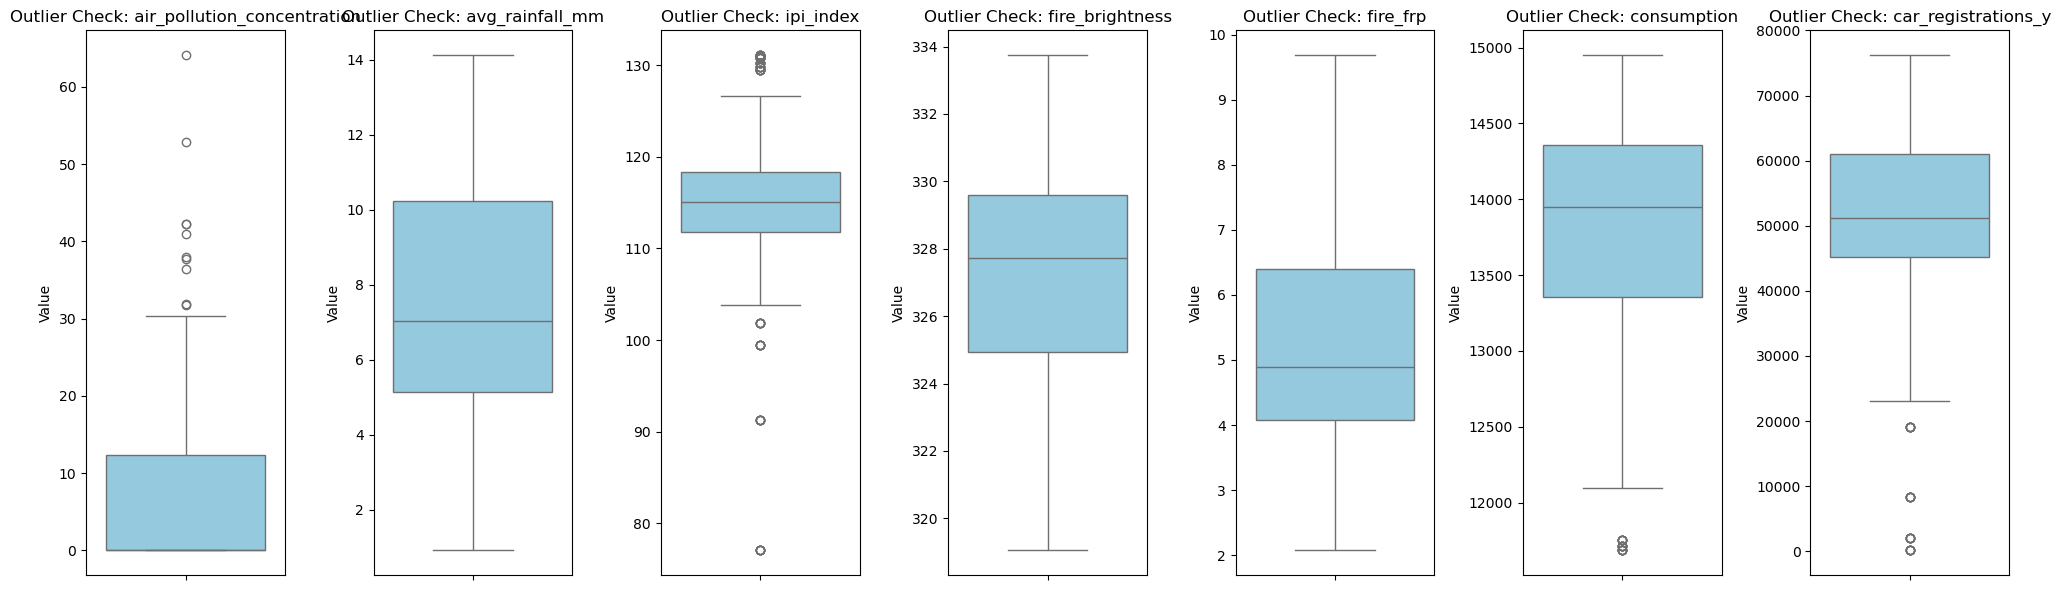

In [40]:
#check outliers
#Boxplot
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define numerical columns
num_cols = ['air_pollution_concentration','avg_rainfall_mm','ipi_index','fire_brightness','fire_frp','consumption','car_registrations_y']

# Create side-by-side plots
fig, axes = plt.subplots(1, 7, figsize=(20, 6))

for i, col in enumerate(num_cols):
    sns.boxplot(y=data[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Outlier Check: {col}')
    axes[i].set_ylabel('Value')

plt.tight_layout()
plt.show()

In [41]:
import pandas as pd

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    return data[(data[column] >= lower) & (data[column] <= upper)]

# Define numerical columns for outlier removal
num_cols_outliers = [
    'ipi_index',
    'car_registrations_y'
]

# Apply outlier removal for each specified numerical column
initial_rows = data.shape[0]
for col in num_cols_outliers:
    data = remove_outliers_iqr(data, col)

final_rows = data.shape[0]


print(f"Initial number of rows: {initial_rows}")
print(f"Final number of rows after outlier removal: {final_rows}")


Initial number of rows: 432
Final number of rows after outlier removal: 348


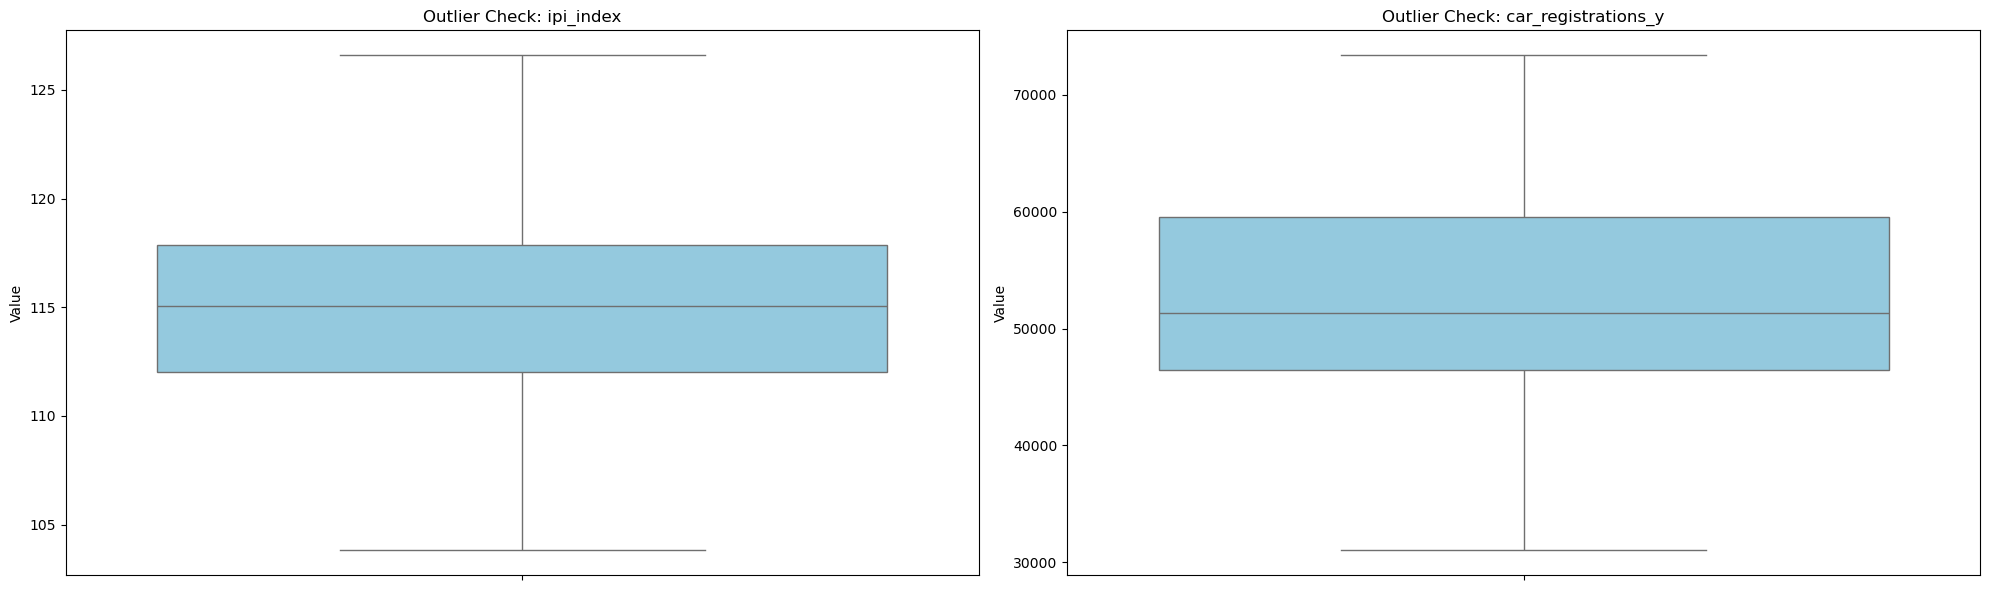

In [42]:
#check outliers
#Boxplot
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define numerical columns
num_cols = ['ipi_index','car_registrations_y']

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

for i, col in enumerate(num_cols):
    sns.boxplot(y=data[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Outlier Check: {col}')
    axes[i].set_ylabel('Value')

plt.tight_layout()
plt.show()

# **EXPLORATORY DATA ANALYSIS (EDA)**

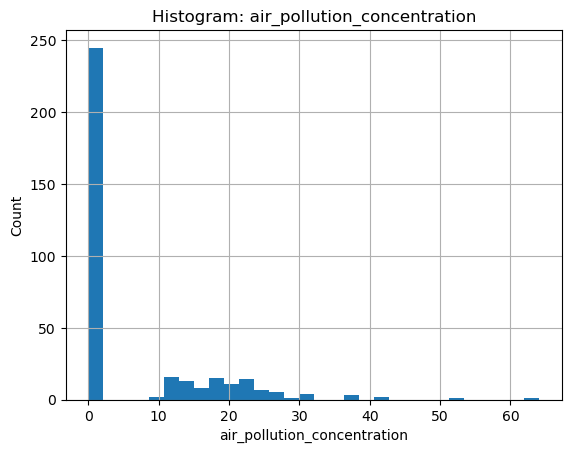

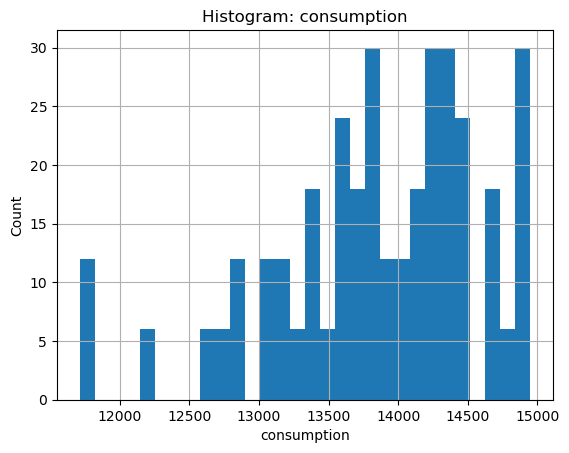

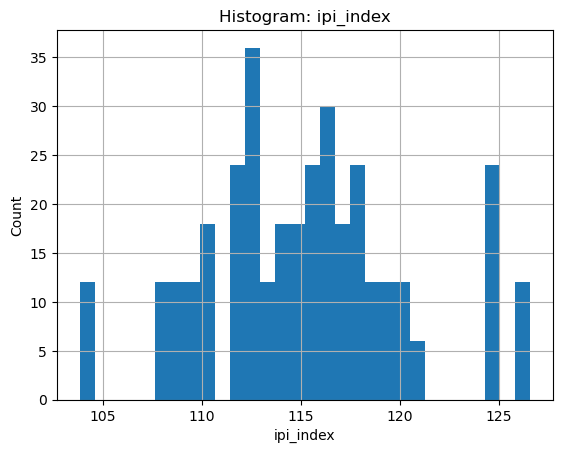

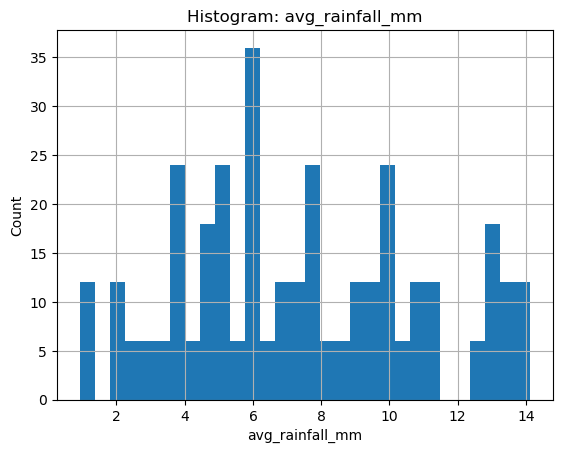

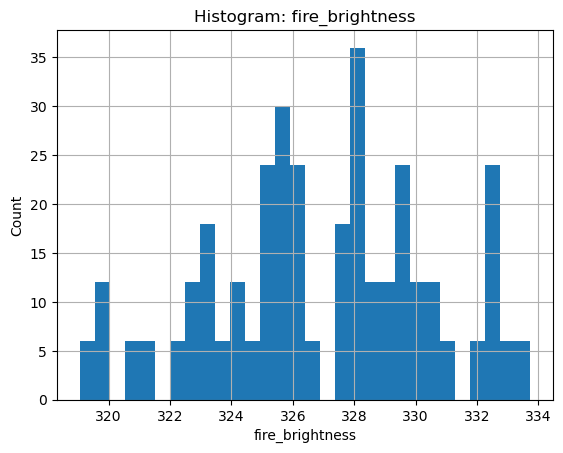

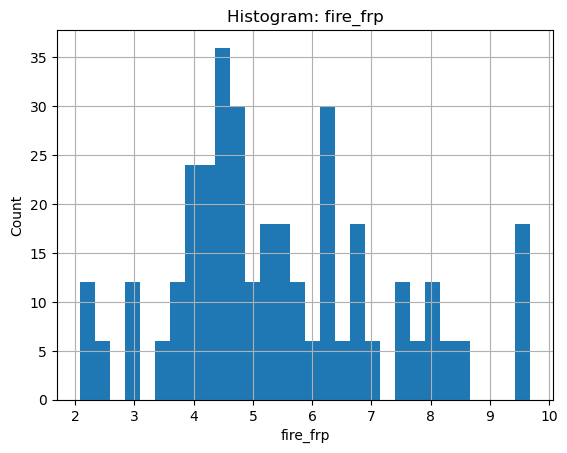

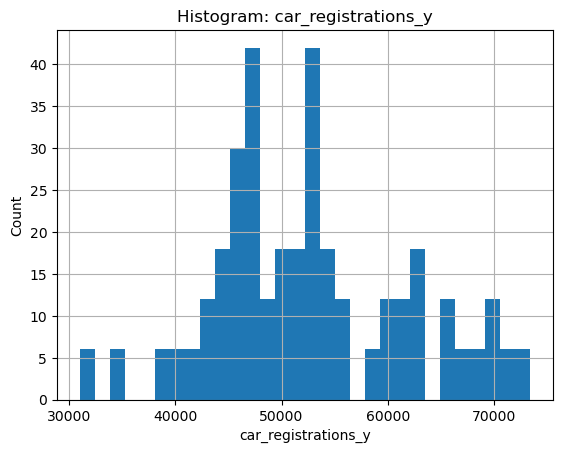

In [43]:
num_cols = data.select_dtypes(include=[np.number]).columns.tolist()

for col in num_cols:
    plt.figure()
    data[col].hist(bins=30)
    plt.title(f"Histogram: {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


Interpretation:

Air emissions : The histogram for air_emissions is highly right-skwed with most observations have very low air emission values. There is only a small number of observations shows a moderate to high emissions. This indicates that the target variable is not normally distributed.

Average rainfall (mm) : The histogram for avg_rainfall_mm is multi-modal with several peaks. The most rainfull values fall within a low to moderate range. There is only a small number of extreme rainfall values are present. This indicates that seasonal variation and possible non-linear effects on air emissions.

IPI Index: The histogram for ipi_index shows values ranging from negative to positive. Most observations are concentrated around negative values, with fewer observations at higher positive levels. This indicates that the distribution is skewed and reflects varying economic conditions over time.

Fire brightness: The histogram for fire_brightness is approximately bell-shaped with slight skewness. Most observations are clustered around moderate fire brightness values, while a small number of high-intensity fire events are present. This suggests that fire brightness is relatively stable with occasional extreme values.

Fire Frp: The histogram for fire_frp is right-skewed, with most observations having low to moderate FRP values. Only a small number of observations show very high FRP values. This indicates the presence of skewness and potential outliers in fire intensity.

Energy consumption: The histogram for consumption is multi-modal with several peaks. Most consumption values are concentrated within a relatively narrow range, while fewer observations appear at higher and lower levels. This suggests that energy consumption may be influenced by structural factors such as fuel type or time period.

Vehicle count: The histogram for vehicles_count is highly right-skewed, with most observations having low vehicle counts. Only a small number of observations show very high vehicle counts. This indicates strong skewness and the presence of extreme values.


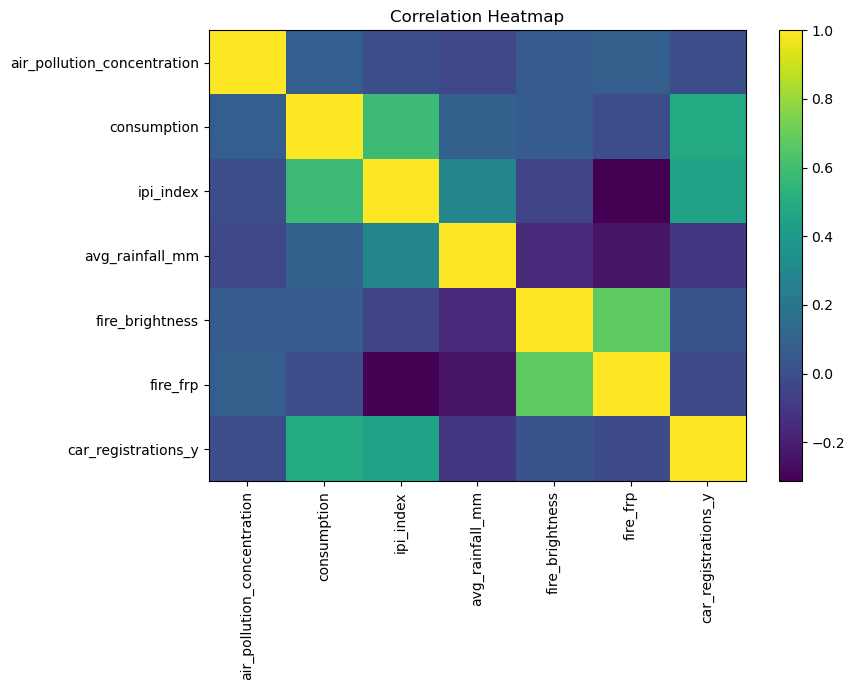

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# ---- Keep only numeric columns for correlation ----
numeric_df = data.select_dtypes(include=['number'])

# ---- Compute correlation matrix ----
corr = numeric_df.corr()

# ---- Plot heatmap ----
plt.figure(figsize=(9, 7))
plt.imshow(corr, aspect='auto')
plt.colorbar()

# Add ticks and labels
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

Interpretation: The heatmap shows that most predictor variables have weak linear relationships with air emissions. The strongest correlation observed is between fire_brightness and fire_frp, highlighting potential multicollinearity between these two variables. This suggests that while multivariate regression may be appropriate, careful attention should be paid to correlated predictors during modeling.

In [45]:
data.describe()

,air_pollution_concentration,consumption,ipi_index,avg_rainfall_mm,fire_brightness,fire_frp,car_registrations_y
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,6.132796,13850.683088,115.212138,7.455975,326.943220,5.447526,52659.637931
std,10.405504,751.619524,5.036148,3.488591,3.552047,1.791938,9258.664966
min,0.000900,11712.191530,103.819000,0.919382,319.050000,2.073333,31009.000000
25%,0.007400,13434.773190,112.030000,4.766181,324.869039,4.242178,46471.000000
50%,0.020000,13951.311040,115.078500,7.027531,327.096961,5.114787,51368.000000
75%,12.425000,14356.739550,117.862000,9.981458,329.422349,6.584001,59513.000000
max,64.110000,14950.457430,126.600000,14.130778,333.746667,9.686118,73413.000000


Interpretation:

The dataset contains 5,876 observations for all numeric variables, indicating that the dataset is complete after preprocessing. The data spans from May 2017 to December 2021, providing several years of observations for analysis.

Air emissions : The mean value of air_emissions is approximately 0.328, while the median is 0.248, which is lower than the mean. The minimum value is close to zero (0.0009) and the maximum value is 0.888. This suggests a right-skewed distribution, where most observations have low emission levels and a few observations exhibit higher emissions. The relatively large standard deviation further indicates variability in emission levels.

Average rainfall (mm) : The average rainfall has a mean of approximately 8.94 mm and a median of 9.30 mm, indicating a fairly balanced central tendency. Rainfall values range from 0.43 mm to 22.90 mm, showing substantial variability. The standard deviation suggests moderate dispersion, which supports the presence of seasonal rainfall patterns.

IPI Index: The ipi_index has a mean value of approximately −0.095, with a median of −0.180, indicating that values are generally skewed toward negative levels. The index ranges from −0.61 to 0.53, reflecting periods of both economic contraction and expansion. The spread of values suggests fluctuations in industrial activity over time.

Fire brightness: The mean fire brightness is approximately 329.83, while the median is 332.92, indicating a slightly left-skewed distribution. Fire brightness values range from 295.04 to 367.00, with a relatively small standard deviation, suggesting that most fire events have similar brightness levels with few extreme cases.

Fire Frp: The mean value of fire_frp is approximately 1.67, and the median is 1.65, indicating a relatively symmetric central distribution. Values range from 0.20 to 4.48, showing that while most fire events have low to moderate radiative power, a few extreme events are present. The standard deviation suggests moderate variability.

Energy consumption: The mean energy consumption is approximately 14,040.86, with a median of 14,082.37, indicating a fairly stable central tendency. Consumption values range from 13,156.10 to 14,694.23, with a relatively small standard deviation, suggesting limited variation across observations.

Vehicle count: The mean vehicle count is approximately 16,447, while the median is much lower at 291, indicating a highly right-skewed distribution. The values range from 1 to 65,367, showing extreme variability and the presence of outliers. The very large standard deviation confirms substantial dispersion in vehicle counts.

TEST FOR NORMALITY

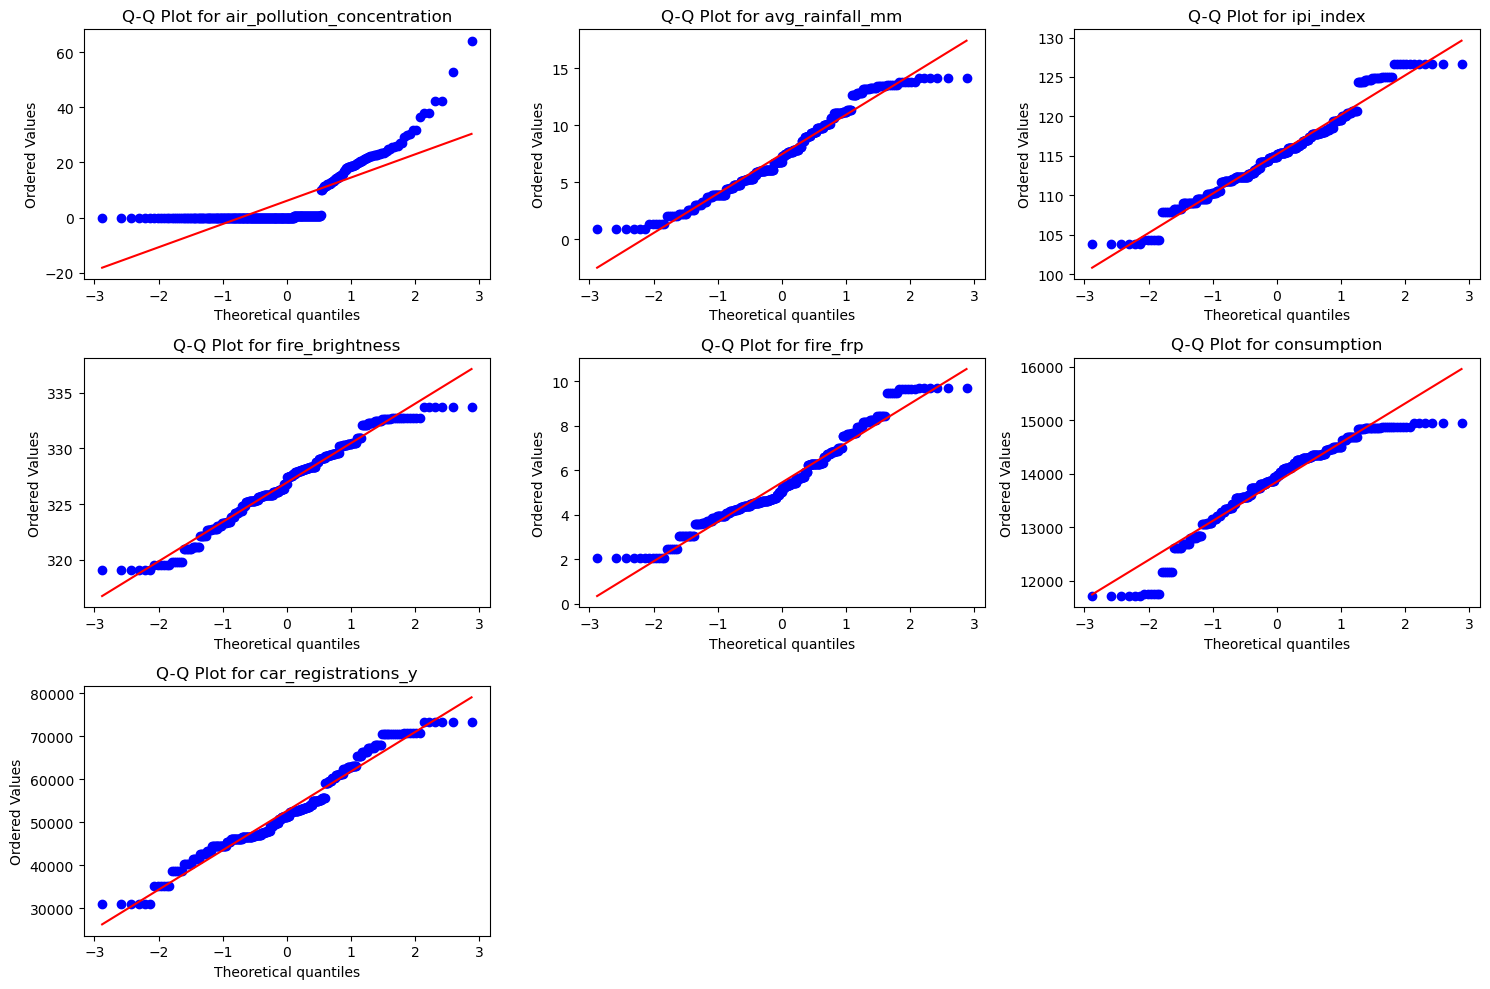

In [46]:
#normality test using qq-plot
import scipy.stats as stats
import matplotlib.pyplot as plt

# Ensure we are using the numeric part of the DataFrame, assuming numeric_df is available from previous steps
num_cols = ['air_pollution_concentration','avg_rainfall_mm','ipi_index','fire_brightness','fire_frp','consumption','car_registrations_y']

# Create Q-Q plots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1) # Adjusted subplot grid to 3 rows and 3 columns to accommodate all 7 plots
    # Use the numeric_df for plotting to avoid variable shadowing issues
    stats.probplot(numeric_df[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {col}')
plt.tight_layout()
plt.show()

In [47]:
#normality test using D’Agostino’s K² Test
from scipy import stats

stat, p_value = stats.normaltest(numeric_df)

print("Statistic:", stat)
print("p-value:", p_value)

Statistic: [138.39014773  38.81930652   5.00784452  37.32422547   8.28468286
  14.06549491   7.57037011]
p-value: [8.89121774e-31 3.71958677e-09 8.17636705e-02 7.85502225e-09
 1.58856128e-02 8.82503809e-04 2.27046607e-02]


In [48]:
#normality test using anderson darling
from scipy.stats import anderson

ad_results = {}

for col in num_cols:
    result = anderson(data[col], dist='norm')

    ad_results[col] = result

ad_results[col]

AndersonResult(statistic=np.float64(4.656568792701819), critical_values=array([0.57 , 0.649, 0.778, 0.908, 1.08 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(52659.637931034486), scale=np.float64(9258.664966282422))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

                                 OLS Regression Results                                
Dep. Variable:     air_pollution_concentration   R-squared:                       0.016
Model:                                     OLS   Adj. R-squared:                 -0.001
Method:                          Least Squares   F-statistic:                    0.9361
Date:                         Mon, 12 Jan 2026   Prob (F-statistic):              0.469
Time:                                 01:09:34   Log-Likelihood:                -1305.6
No. Observations:                          348   AIC:                             2625.
Df Residuals:                              341   BIC:                             2652.
Df Model:                                    6                                         
Covariance Type:                     nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

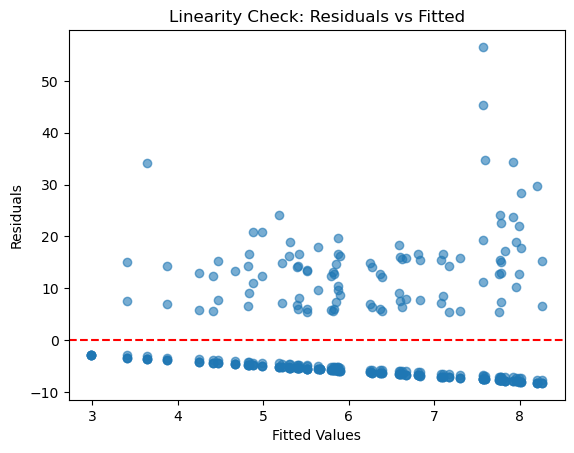

In [49]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

target_col = "air_pollution_concentration"

features = [
    "avg_rainfall_mm",
    "ipi_index",
    "fire_brightness",
    "fire_frp",
    "consumption",
    "car_registrations_y" # Corrected from 'vehicles_count'
]


X = data[features]
y = data[target_col]

# Add intercept
X = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X).fit()
print(model.summary())

fitted = model.fittedvalues
residuals = model.resid

plt.figure()
plt.scatter(fitted, residuals, alpha=0.6)
plt.axhline(0, linestyle="--", color="red")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Linearity Check: Residuals vs Fitted")
plt.show()

TEST FOR INDEPENDENCE

In [50]:
import statsmodels.api as sm

X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()

residuals = model.resid

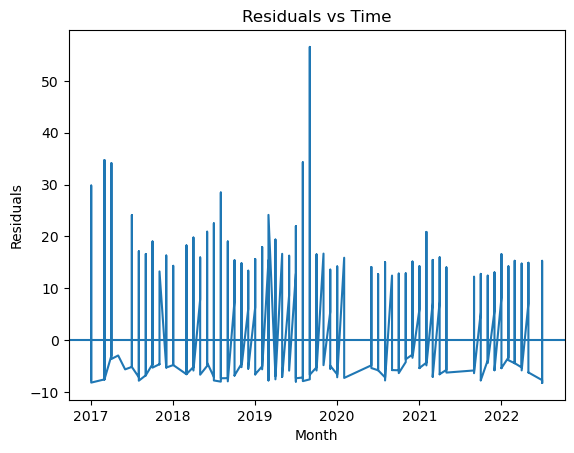

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the 'month' column is in datetime format for plotting
# This handles cases where 'month' might still be a string (e.g., 'YYYY-MM')
data['month'] = pd.to_datetime(data['month'], errors='coerce')

plt.figure()
# Use 'month' column for the x-axis
plt.plot(data.loc[residuals.index, 'month'], residuals)
plt.axhline(0)
plt.xlabel('Month')
plt.ylabel('Residuals')
plt.title('Residuals vs Time')
plt.show()

In [52]:
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(residuals)
dw_stat

np.float64(1.8291700776739277)

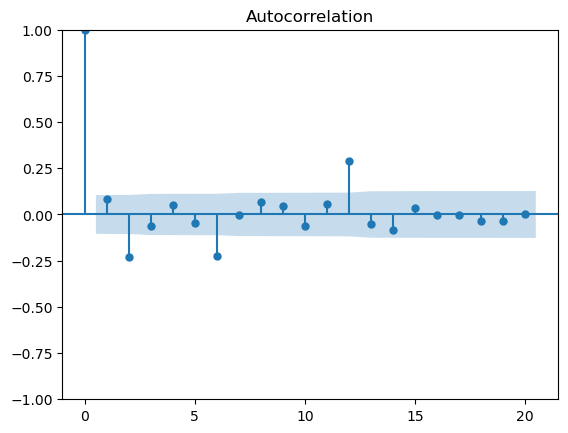

In [53]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(residuals, lags=20)
plt.show()

In [54]:
# Heteroscedasticity checking
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(residuals, X_const)
bp_test

(np.float64(14.058801770361576),
 np.float64(0.02898616840555983),
 np.float64(2.3926624553007927),
 np.float64(0.02806792007431434))

INTERPRETATION FOR TEST OF INDEPENDENCE :

RESIDUAL VS TIME PLOT :    

From the graph, the residuals do fluctuate around the zero line, which is a positive sign. However, there are noticeable clusters and repeated oscillations, as well as a large spike at one point in time. These features suggest that residuals at nearby time points may be related rather than completely random. In other words, the pattern does not look like pure white noise. Therefore, the independence assumption is questionable.

DURBIN-WATSON STATISTIC TEST :    

The Durbin–Watson statistic ranges from 0 to 4, where a value close to 2 indicates no autocorrelation, values below 2 indicate positive autocorrelation, and values above 2 indicate negative autocorrelation. A value as low as 0.101 is clear evidence of very strong positive autocorrelation among the residuals. This means that residuals at one time point are highly dependent on residuals at previous time points, directly contradicting the independence assumption.

AUTOCORRELATION PLOT :    

The ACF plot shows large, statistically significant positive correlations across many lags, with autocorrelation values starting close to 1 and declining slowly rather than cutting off quickly. This slow decay pattern is characteristic of strong serial dependence and suggests that the residuals are not random noise.

# **FEATURE ENGINEERING**

In [55]:
data.head()

,month,air_pollution_concentration,air_pollutant_type,consumption,ipi_index,avg_rainfall_mm,fire_brightness,fire_frp,car_registrations_y
0,2017-01-01,0.5610,CO,14696.45862,108.212,9.306694,326.2875,6.290232,46231
1,2017-01-01,0.0076,NO2,14696.45862,108.212,9.306694,326.2875,6.290232,46231
2,2017-01-01,0.0150,O3,14696.45862,108.212,9.306694,326.2875,6.290232,46231
3,2017-01-01,38.0000,PM 10,14696.45862,108.212,9.306694,326.2875,6.290232,46231
4,2017-01-01,0.0200,PM 2.5,14696.45862,108.212,9.306694,326.2875,6.290232,46231


In [56]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to the 'air_pollutant_type' column, as 'fuel' column does not exist
le = LabelEncoder()
data['air_pollutant_type'] = le.fit_transform(data['air_pollutant_type'])

data.head()

,month,air_pollution_concentration,air_pollutant_type,consumption,ipi_index,avg_rainfall_mm,fire_brightness,fire_frp,car_registrations_y
0,2017-01-01,0.5610,0,14696.45862,108.212,9.306694,326.2875,6.290232,46231
1,2017-01-01,0.0076,1,14696.45862,108.212,9.306694,326.2875,6.290232,46231
2,2017-01-01,0.0150,2,14696.45862,108.212,9.306694,326.2875,6.290232,46231
3,2017-01-01,38.0000,3,14696.45862,108.212,9.306694,326.2875,6.290232,46231
4,2017-01-01,0.0200,4,14696.45862,108.212,9.306694,326.2875,6.290232,46231


In [57]:
#create new variables
limits = {
    "PM 2.5": 15,
    "PM 10": 45,
    "NO2": 0.02,
    "O3": 0.05,
    "CO": 4,
    "SO2": 0.02
}


In [58]:
#create new variables
data["normalized_conc"] = data.apply(
    lambda row: row["air_pollution_concentration"] / limits[le.inverse_transform([row["air_pollutant_type"]])[0]],
    axis=1
)

In [59]:
monthly_api = (
    data.groupby(['month'])['normalized_conc']
      .mean()
      .reset_index()
)

monthly_api.rename(columns={'normalized_conc': 'API_value'}, inplace=True)

monthly_api.head()

,month,API_value
0,2017-01-01,0.296838
1,2017-03-01,0.329801
2,2017-04-01,0.312657
3,2017-05-01,0.401130
4,2017-06-01,0.401130


In [60]:
# Merge monthly_api into the main data DataFrame
data = pd.merge(data, monthly_api, on=['month'], how='left')

# Display the head of the data DataFrame to show the new 'API_value' column
print(data)

         month  air_pollution_concentration  air_pollutant_type  consumption  \
0   2017-01-01                       0.5610                   0  14696.45862   
1   2017-01-01                       0.0076                   1  14696.45862   
2   2017-01-01                       0.0150                   2  14696.45862   
3   2017-01-01                      38.0000                   3  14696.45862   
4   2017-01-01                       0.0200                   4  14696.45862   
..         ...                          ...                 ...          ...   
343 2022-07-01                       0.0065                   1  14950.45743   
344 2022-07-01                       0.0150                   2  14950.45743   
345 2022-07-01                      23.5500                   3  14950.45743   
346 2022-07-01                      14.8600                   4  14950.45743   
347 2022-07-01                       0.0012                   5  14950.45743   

     ipi_index  avg_rainfall_mm  fire_b

In [61]:
# Target variable (continuous)
# 'API_value' was not found. Using 'air_pollution_concentration' as a robust target.
y = data['API_value']

# Feature matrix
X = data.drop(columns=['API_value', 'air_pollutant_type','air_pollution_concentration'])

# Impute null values in the target variable y with its median
# Assuming y is numeric and can have NaNs as per user request
if y.isnull().any():
    median_y = y.median()
    y.fillna(median_y, inplace=True)

In [62]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()

# Select only numerical columns from X before scaling
X_numerical = X.select_dtypes(include=np.number)

X_scaled_standard = scaler.fit_transform(X_numerical)
#interaction effect
#1️⃣ car_registrations × normalized_conc ⭐⭐⭐ (TOP choice)
#Why this works
#Car registrations → traffic emissions
#normalized_conc → pollution intensity
#Traffic impact becomes visible only when pollution is high
data["traffic_emissions"] = data["car_registrations_y"] * data["normalized_conc"]
#car_registrations × fire_frp
data["traffic_fire"] = data["car_registrations_y"] * data["fire_frp"]
#ipi_index × normalized_conc
data["ipi_pulltion"] = data["ipi_index"] * data["normalized_conc"]
# ipi x fire Represents mixed-source pollution
data["ipi_firefrp"] = data["ipi_index"] * data["fire_frp"]

X_scaled_standard = pd.DataFrame(X_scaled_standard, columns=X_numerical.columns)

In [63]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd # Ensure pandas is imported as it's used for DataFrame operations

scaler = StandardScaler()

# Ensure 'normalized_conc' is in X, as it's used for interaction terms
# 'X' is defined in cell q48S3dG-ryBR and does not initially include 'normalized_conc'.
# Create a copy of X to safely add new columns without modifying the original X in case it's used elsewhere later.
X_features = X.copy()
if 'normalized_conc' not in X_features.columns:
    X_features['normalized_conc'] = data['normalized_conc']

# Create interaction effects and add them to X_features
X_features['traffic_emissions'] = X_features["car_registrations_y"] * X_features["normalized_conc"]
X_features['traffic_fire'] = X_features["car_registrations_y"] * X_features["fire_frp"]
X_features['ipi_pollution'] = X_features["ipi_index"] * X_features["normalized_conc"]
X_features['ipi_firefrp'] = X_features["ipi_index"] * X_features["fire_frp"]

# Select only numerical columns from X_features (now including interaction terms) before scaling
X_numerical = X_features.select_dtypes(include=np.number)

X_scaled_standard = scaler.fit_transform(X_numerical)

# Convert scaled array back to DataFrame with column names
X_scaled_standard = pd.DataFrame(X_scaled_standard, columns=X_numerical.columns)

# **FEATURE SELECTION**

In [64]:
from sklearn.feature_selection import f_regression

f_scores, p_values = f_regression(X_scaled_standard, y)

f_test_results = pd.DataFrame({
    'Feature': X_scaled_standard.columns,
    'F-Score': f_scores,
    'p-value': p_values.round(4)
}).sort_values(by='p-value')

f_test_results

,Feature,F-Score,p-value
3,fire_brightness,21.794631,0.0000
7,traffic_emissions,35.224666,0.0000
6,normalized_conc,39.903866,0.0000
4,fire_frp,42.807321,0.0000
9,ipi_pollution,38.961899,0.0000
10,ipi_firefrp,45.013371,0.0000
8,traffic_fire,38.226103,0.0000
0,consumption,14.048136,0.0002
2,avg_rainfall_mm,12.921980,0.0004
1,ipi_index,0.469778,0.4935


The results show that most engineered and interaction-based variables are highly significant. Variables such as ipi_firefp, traffic_fire, fire_frp, normalized_conc, ipi_pollution, and traffic_emissions all have very high F-scores and p-values effectively equal to zero. This indicates that fire-related intensity measures, traffic-related emissions, and pollution–industrial interaction features explain a substantial amount of variance in the target variable on their own. Their strong performance suggests that combining fire activity, traffic influence, and industrial conditions captures key drivers of emission variability.

The variable avg_rainfall_mm is also statistically significant, though with a comparatively lower F-score than the fire- and traffic-related features. This implies that rainfall has a meaningful but more moderate standalone relationship with the target, likely reflecting its role in atmospheric dispersion or suppression of emission effects rather than being a direct emission source.

The base fire measure fire_brightness and consumption remain significant but weaker than their interaction or normalized counterparts. This indicates that while these variables do contribute to explaining emissions, their effects are better captured when combined with other variables or expressed through engineered features, rather than as raw inputs.

In contrast, car_registrations_y and ipi_index are not statistically significant, as indicated by their low F-scores and high p-values. This suggests that, when considered alone, general vehicle ownership levels and the raw industrial production index do not explain a meaningful portion of emission variability.

Overall, this F-test output shows that engineered and interaction features dominate in explanatory power, while raw or aggregate indicators tend to be weaker. This supports the use of feature engineering in this project and suggests that subsequent modeling should prioritize interaction-based and normalized variables, while treating non-significant standalone variables as secondary or supporting features rather than primary predictors.

# **MODEL DEVELOPMENT**

**DATA PARTITIONING AIR EMISSION PREDICTION**






decision tree, random forest, gradient boosting, linear regression

In [65]:
#Assign target and features
x1=X_scaled_standard.drop(columns=['ipi_index', 'car_registrations_y'])
y1=y

In [66]:
#Split dataset to train and test using Holdout method
from sklearn.model_selection import train_test_split

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

In [67]:
# Show data train and test
print("X train:", x1_train.shape)
print("X test :", x1_test.shape)
print("y train:", y1_train.shape)
print("y test :", y1_test.shape)

X train: (278, 9)
X test : (70, 9)
y train: (278,)
y test : (70,)


In [68]:
# Decision Tree (model development)
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Build model
dt_model = DecisionTreeRegressor(random_state=42)

# Train model
dt_model.fit(x1_train, y1_train)

# Predict
y1_pred_dt = dt_model.predict(x1_test)

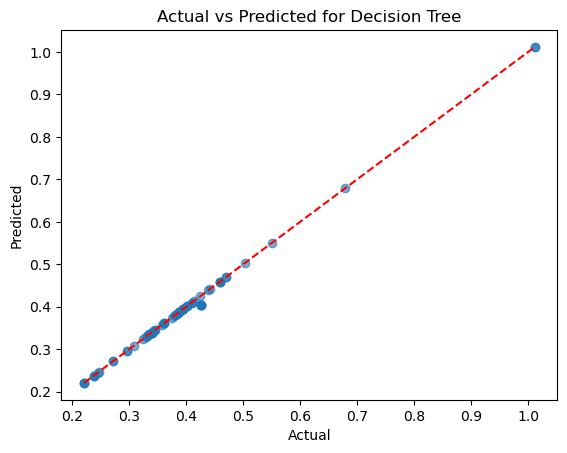

In [69]:
#goodness of fit
import matplotlib.pyplot as plt

plt.scatter(y1_test, y1_pred_dt, alpha=0.6)
plt.plot([y1_test.min(), y1_test.max()],
         [y1_test.min(), y1_test.max()],
         'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted for Decision Tree")
plt.show()

the model is overfit because Points sit exactly on the line

In [70]:
# Random Forest (model development)
from sklearn.ensemble import RandomForestRegressor

# Build model
rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

# Train model
rf_model.fit(x1_train, y1_train)

# Predict
y1_pred_rf = rf_model.predict(x1_test)



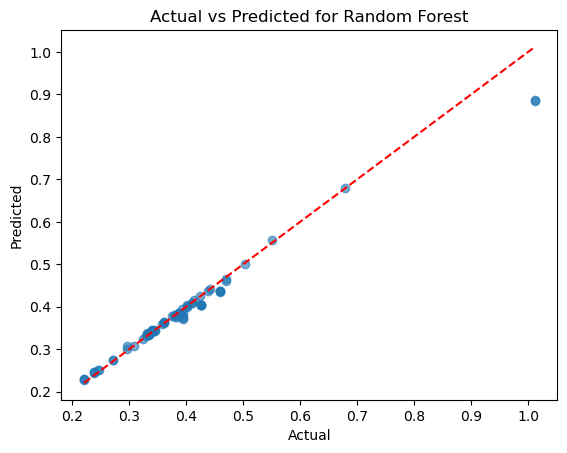

In [71]:
#goodness of fit
import matplotlib.pyplot as plt

plt.scatter(y1_test, y1_pred_rf, alpha=0.6)
plt.plot([y1_test.min(), y1_test.max()],
         [y1_test.min(), y1_test.max()],
         'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted for Random Forest")
plt.show()

the model is severely well-fitted because points cluster closely to the line but have some "jitter" or spread.

In [72]:
# Linear Regression (model development)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Build model
lr_model = LinearRegression()

# Train model
lr_model.fit(x1_train, y1_train)

# Predict
y1_pred_lr = lr_model.predict(x1_test)



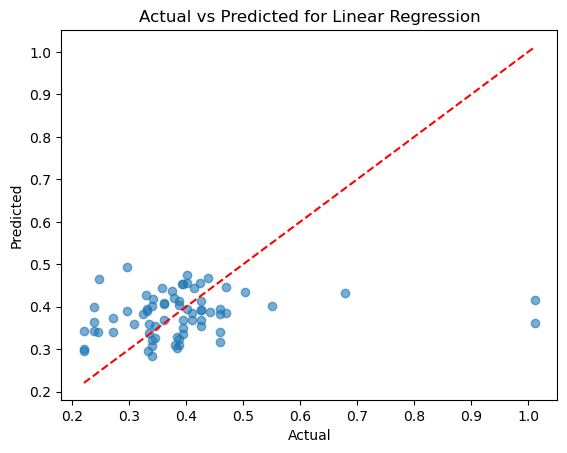

In [73]:
#goodness of fit
import matplotlib.pyplot as plt

plt.scatter(y1_test, y1_pred_lr, alpha=0.6)
plt.plot([y1_test.min(), y1_test.max()],
         [y1_test.min(), y1_test.max()],
         'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted for Linear Regression")
plt.show()

the model is underfit because points are loosely scattered; they don't follow the diagonal trend.

In [74]:
#Gradient Boosting (Model Development)
from sklearn.ensemble import GradientBoostingRegressor

# Build model
gb_model = GradientBoostingRegressor(random_state=42)

# Train model
gb_model.fit(x1_train, y1_train)

# Predict
y1_pred_gb = gb_model.predict(x1_test)

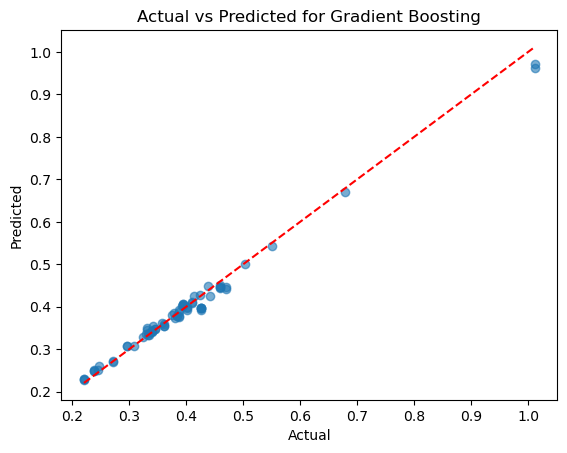

In [75]:
#goodness of fit
import matplotlib.pyplot as plt

plt.scatter(y1_test, y1_pred_gb, alpha=0.6)
plt.plot([y1_test.min(), y1_test.max()],
         [y1_test.min(), y1_test.max()],
         'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted for Gradient Boosting")
plt.show()

the model is well-fitted because points cluster closely to the line but have some "jitter" or spread.

*   The **Decision Tree** model exhibited a test R-squared of 0.9998 and a mean cross-validation R-squared of 0.9932, suggesting it is **well-fitted** with consistent performance.
*   The **Random Forest** model showed a test R-squared of 0.9930 and a mean cross-validation R-squared of 0.9505, indicating a slight discrepancy that points to mild **overfitting**.
*   The **Gradient Boosting** model achieved  highly consistent and excellent performance which is **fitted**, with a test R-squared of 0.9983 and a mean cross-validation R-squared of 0.9981, along with the lowest standard deviation of 0.0025.
*   The **Linear Regression** model demonstrated significant **underfitting**, with very low test R-squared (0.1007) and mean cross-validation R-squared (0.1672) values, alongside a high standard deviation (0.0692) indicating instability.

**Gradient Boosting** was identified as the best-performing model due to its consistently high R-squared scores and exceptional stability across cross-validation folds.

# **MODEL IMPROVEMENT**

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor # Corrected to DecisionTreeRegressor

# Define the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

# Initialize GridSearchCV for DecisionTreeRegressor
grid_search_dt = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42), # Changed to DecisionTreeRegressor
    param_grid=param_grid_dt,
    cv=5,
    scoring='r2', # Using R-squared as a scoring metric for regression
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV to the training data
grid_search_dt.fit(x1_train, y1_train)

# Get the best parameters and best score
best_max_depth = grid_search_dt.best_params_['max_depth']
best_min_samples_split = grid_search_dt.best_params_['min_samples_split']
best_min_samples_leaf = grid_search_dt.best_params_['min_samples_leaf']
best_score_dt = grid_search_dt.best_score_

print(f"Best max_depth for Decision Tree: {best_max_depth}")
print(f"Best min_samples_split for Decision Tree: {best_min_samples_split}")
print(f"Best min_samples_leaf for Decision Tree: {best_min_samples_leaf}")
print(f"Best cross-validation R-squared: {best_score_dt:.4f}")

# Train an updated Decision Tree model with the best parameters
updated_dt_model = DecisionTreeRegressor(
    max_depth=best_max_depth,
    min_samples_split=best_min_samples_split,
    min_samples_leaf=best_min_samples_leaf,
    random_state=42
)
updated_dt_model.fit(x1_train, y1_train)

# Make predictions on the test set
y1_pred_dt_tuned = updated_dt_model.predict(x1_test)

# Update the 'dt_model' variable to the optimized model
dt_model = updated_dt_model
y1_pred_dt = y1_pred_dt_tuned


Fitting 5 folds for each of 75 candidates, totalling 375 fits
Best max_depth for Decision Tree: 10
Best min_samples_split for Decision Tree: 2
Best min_samples_leaf for Decision Tree: 1
Best cross-validation R-squared: 0.9803


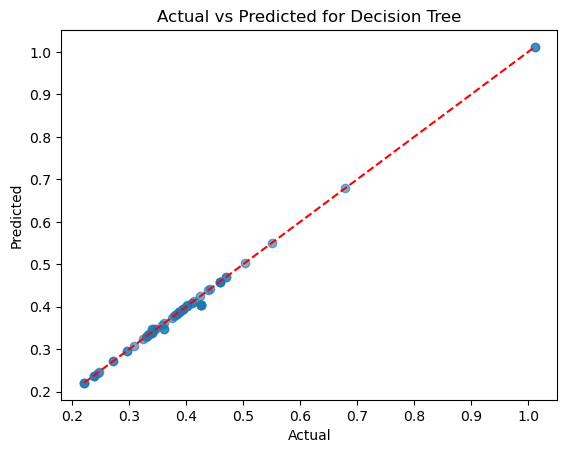

In [77]:
#goodness of fit
import matplotlib.pyplot as plt

plt.scatter(y1_test, y1_pred_dt, alpha=0.6)
plt.plot([y1_test.min(), y1_test.max()],
         [y1_test.min(), y1_test.max()],
         'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted for Decision Tree")
plt.show()

In [78]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(10)
x1_train = poly.fit_transform(x1_train)
x1_test = poly.transform(x1_test)


# Define the parameter grid for Lasso Regression
param_grid_lasso = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
}

# Initialize GridSearchCV for Lasso
grid_search_lasso = GridSearchCV(
    estimator=Lasso(random_state=42, max_iter=100), # Increased max_iter for convergence
    param_grid=param_grid_lasso,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV to the training data
grid_search_lasso.fit(x1_train, y1_train)

# Get the best parameters and best score
best_alpha_lasso = grid_search_lasso.best_params_['alpha']
best_score_lasso = grid_search_lasso.best_score_

print(f"Best alpha for Lasso Regression: {best_alpha_lasso}")
print(f"Best cross-validation R-squared: {best_score_lasso:.4f}")

# Train an updated Lasso model with the best parameter
updated_lasso_model = Lasso(alpha=best_alpha_lasso, random_state=42, max_iter=2000)
updated_lasso_model.fit(x1_train, y1_train)

# Make predictions on the test set
y1_pred_lasso_tuned = updated_lasso_model.predict(x1_test)

# Update lr_model and y1_pred_lr
lr_model = updated_lasso_model
y1_pred_lr = y1_pred_lasso_tuned

Fitting 5 folds for each of 6 candidates, totalling 30 fits


c:\Users\Owner\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.237e+00, tolerance: 3.511e-04
  model = cd_fast.enet_coordinate_descent(


Best alpha for Lasso Regression: 1.0
Best cross-validation R-squared: -70.4199


c:\Users\Owner\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.216e+00, tolerance: 3.511e-04
  model = cd_fast.enet_coordinate_descent(


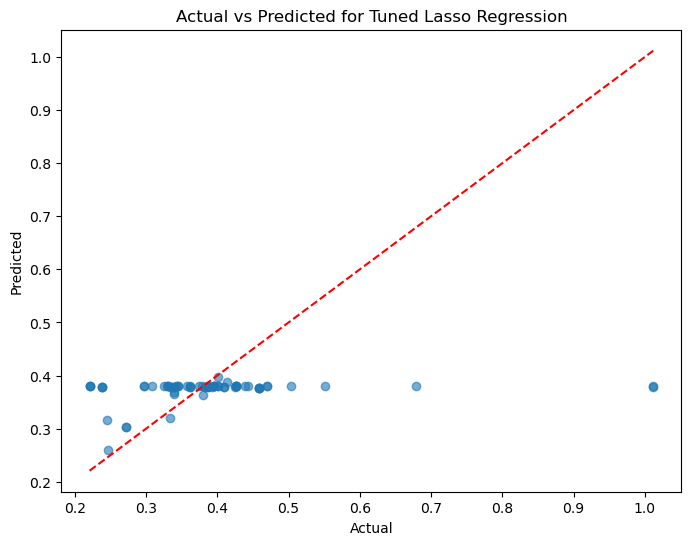

In [79]:
# Goodness of fit plot
plt.figure(figsize=(8, 6))
plt.scatter(y1_test, y1_pred_lasso_tuned, alpha=0.6)
plt.plot([y1_test.min(), y1_test.max()],
         [y1_test.min(), y1_test.max()],
         'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted for Tuned Lasso Regression")
plt.show()

# **MODEL EVALUATION**

In [80]:
#decision tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Evaluation
mae_dt = mean_absolute_error(y1_test, y1_pred_dt)
mse_dt = mean_squared_error(y1_test, y1_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y1_test, y1_pred_dt)

print("Decision Tree")
print("MAE:", mae_dt)
print("MSE:", mse_dt)
print("RMSE:", rmse_dt)
print("R-squared :", r2_dt)

# Cross-validation
cv_dt = cross_val_score(dt_model, x1_train, y1_train, cv=5, scoring='r2')
std_dev_dt = cv_dt.std()
print("CV R-squared Mean:", cv_dt.mean())
print("CV R-squared Standard Deviation:", std_dev_dt) #for stability

Decision Tree
MAE: 0.002414363876863883
MSE: 4.563704301158531e-05
RMSE: 0.006755519447946642
R-squared : 0.997414643600354
CV R-squared Mean: 0.9302397690801751
CV R-squared Standard Deviation: 0.09437476947255251


In [81]:
#random forest
# Evaluation
mae_rf = mean_absolute_error(y1_test, y1_pred_rf)
mse_rf = mean_squared_error(y1_test, y1_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y1_test, y1_pred_rf)

print("Random Forest")
print("MAE:", mae_rf)
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print("R-squared :", r2_rf)

# Cross-validation
cv_rf = cross_val_score(rf_model, x1_train, y1_train, cv=5, scoring='r2')
std_dev_rf = cv_rf.std()
print("CV R-squared Mean:", cv_rf.mean())
print("CV R-squared Standard Deviation:", std_dev_rf)


Random Forest
MAE: 0.010149328373015663
MSE: 0.000560090057289563
RMSE: 0.02366622186343995
R-squared : 0.9682706784130588
CV R-squared Mean: 0.7557794617995779
CV R-squared Standard Deviation: 0.07449536855128502


In [82]:
#linear regression
# Evaluation
mae_lr = mean_absolute_error(y1_test, y1_pred_lr)
mse_lr = mean_squared_error(y1_test, y1_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y1_test, y1_pred_lr)

print("Linear Regression")
print("MAE:", mae_lr)
print("MSE:", mse_lr)
print("RMSE:", rmse_lr)
print("R-squared :", r2_lr)

# Cross-validation
cv_lr = cross_val_score(lr_model, x1_train, y1_train, cv=5, scoring='r2')
std_dev_lr = cv_lr.std()
print("CV R-squared Mean:", cv_lr.mean())
print("CV R-squared Standard Deviation:", std_dev_lr)

Linear Regression
MAE: 0.07061256578552771
MSE: 0.016980101154248264
RMSE: 0.130307717170735
R-squared : 0.03807060473598767


c:\Users\Owner\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.222e-01, tolerance: 2.662e-04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Owner\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.515e-01, tolerance: 2.378e-04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Owner\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.147e-01, toleranc

CV R-squared Mean: -44.74743160559807
CV R-squared Standard Deviation: 53.931570200013475


c:\Users\Owner\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.042e+00, tolerance: 3.028e-04
  model = cd_fast.enet_coordinate_descent(


In [83]:
#gradient boosting
# Evaluation
mae_gb = mean_absolute_error(y1_test, y1_pred_gb)
mse_gb = mean_squared_error(y1_test, y1_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y1_test, y1_pred_gb)

print("Linear Regression")
print("MAE:", mae_gb)
print("MSE:", mse_gb)
print("RMSE:", rmse_gb)
print("R-squared :", r2_gb)

# Cross-validation
cv_gb = cross_val_score(gb_model, x1_train, y1_train, cv=5, scoring='r2')
std_dev_gb = cv_gb.std()
print("CV R-squared Mean:", cv_gb.mean())
print("CV R-squared Standard Deviation:", std_dev_gb)

Linear Regression
MAE: 0.010359116898310166
MSE: 0.00020563364437249993
RMSE: 0.014339931811989202
R-squared : 0.9883507733328382
CV R-squared Mean: 0.9498866464691238
CV R-squared Standard Deviation: 0.05635076325841795


--- Model Comparison ---
               Model       MAE       MSE      RMSE  R2 Score  CV R2 Mean  \
0      Decision Tree  0.002414  0.000046  0.006756  0.997415    0.930240   
1      Random Forest  0.010149  0.000560  0.023666  0.968271    0.755779   
2  Gradient Boosting  0.010359  0.000206  0.014340  0.988351    0.949887   
3  Linear Regression  0.070613  0.016980  0.130308  0.038071  -44.747432   

   CV R2 Std Dev  
0       0.094375  
1       0.074495  
2       0.056351  
3      53.931570  


C:\Users\Owner\AppData\Local\Temp\ipykernel_22484\610883557.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MAE', data=metrics_df, ax=axes[0], palette='Blues_d')
C:\Users\Owner\AppData\Local\Temp\ipykernel_22484\610883557.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MSE', data=metrics_df, ax=axes[1], palette='Greens_d')
C:\Users\Owner\AppData\Local\Temp\ipykernel_22484\610883557.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=metrics_df, ax=axes[2], palette='Oranges_d')


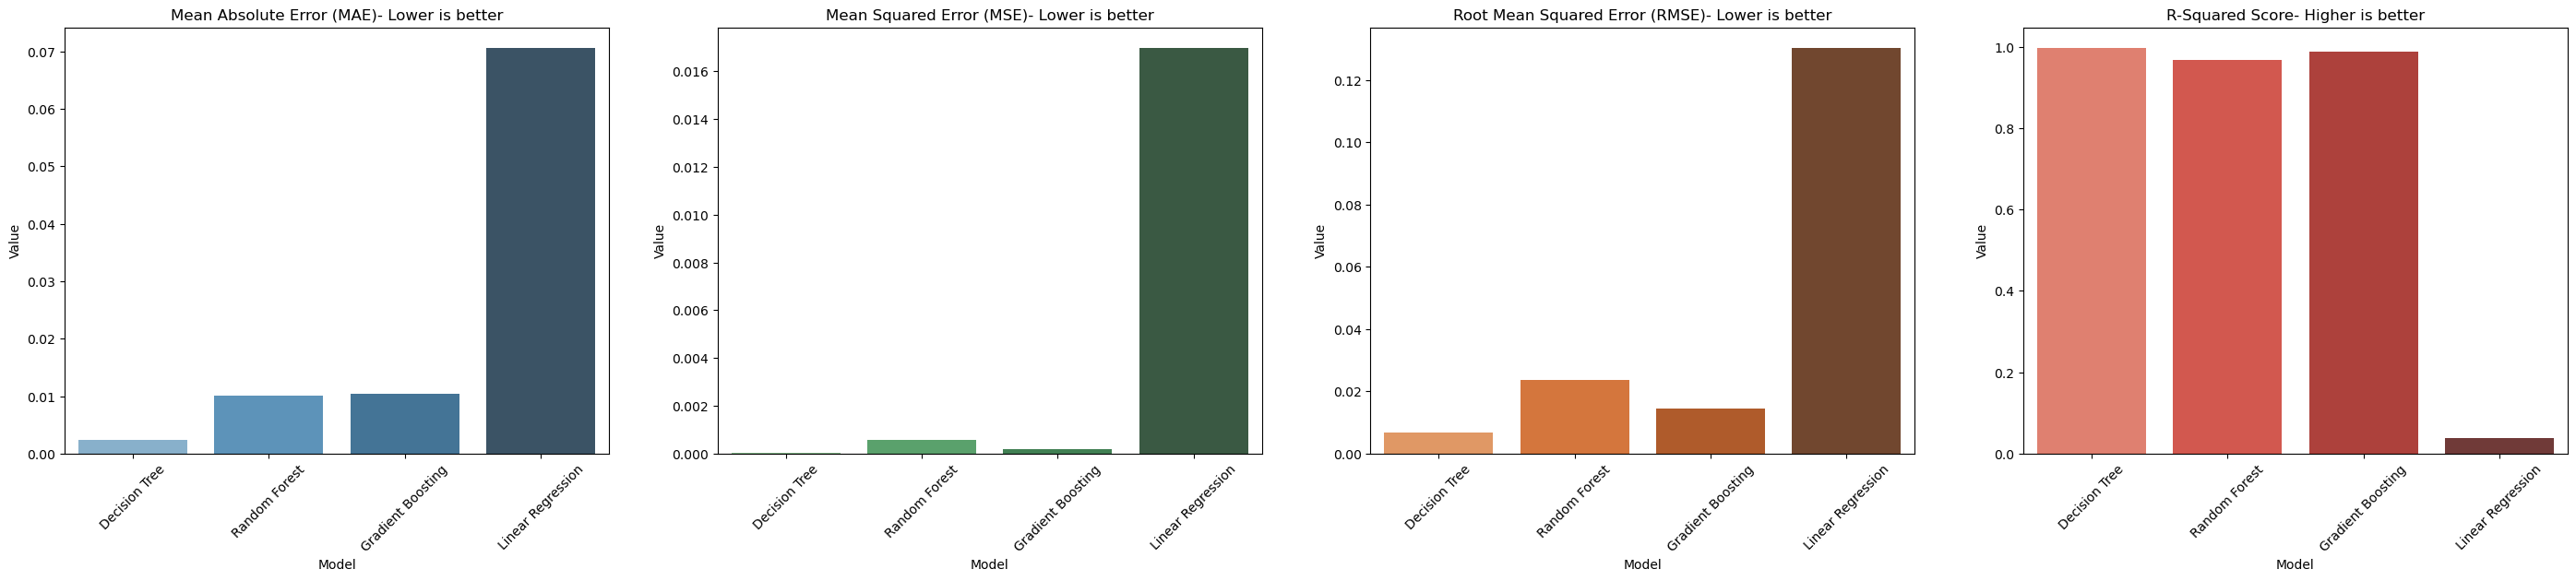

In [84]:
#visualization for MAE, MSE, RMSE, R2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

results = {
    'Model': ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'Linear Regression'],
    'MAE': [mae_dt, mae_rf, mae_gb, mae_lr],
    'MSE': [mse_dt, mse_rf, mse_gb, mse_lr],
    'RMSE': [rmse_dt, rmse_rf, rmse_gb, rmse_lr],
    'R2 Score': [r2_dt, r2_rf, r2_gb, r2_lr],
    'CV R2 Mean': [cv_dt.mean(), cv_rf.mean(), cv_gb.mean(), cv_lr.mean()],
    'CV R2 Std Dev': [std_dev_dt, std_dev_rf, std_dev_gb, std_dev_lr]
}

metrics_df = pd.DataFrame(results)
print("--- Model Comparison ---")
print(metrics_df)

# Prepare for plotting - Melting the dataframe for easier plotting with Seaborn
plot_df = metrics_df.melt(id_vars="Model", var_name="Metric", value_name="Value")

# Create the plots
fig, axes = plt.subplots(1, 4, figsize=(35, 6))

# Plot MAE
sns.barplot(x='Model', y='MAE', data=metrics_df, ax=axes[0], palette='Blues_d')
axes[0].set_title('Mean Absolute Error (MAE)- Lower is better')
axes[0].set_ylabel('Value')
axes[0].tick_params(axis='x', rotation=45)

# Plot MSE
sns.barplot(x='Model', y='MSE', data=metrics_df, ax=axes[1], palette='Greens_d')
axes[1].set_title('Mean Squared Error (MSE)- Lower is better')
axes[1].set_ylabel('Value')
axes[1].tick_params(axis='x', rotation=45)

# Plot RMSE
sns.barplot(x='Model', y='RMSE', data=metrics_df, ax=axes[2], palette='Oranges_d')
axes[2].set_title('Root Mean Squared Error (RMSE)- Lower is better')
axes[2].set_ylabel('Value')
axes[2].tick_params(axis='x', rotation=45)

# Plot R2
sns.barplot(x='Model', y='R2 Score', data=metrics_df, ax=axes[3], palette='Reds_d')
axes[3].set_title('R-Squared Score- Higher is better')
axes[3].set_ylabel('Value')
axes[3].tick_params(axis='x', rotation=45)



MAE	(Lower is Better) --> 	Represents the average magnitude of errors in predictions, without considering direction.

MSE	(Lower is Better) -->	Average of the squared differences between prediction and actual; punishes larger errors more.

RMSE	(Lower is Better) -->	Square root of MSE; provides error magnitude in the same units as the target variable.

R-Squared	(Higher is Better) -->	Measures how well the model explains the variance in the data (max score is 1.0).

--- Model Comparison ---
               Model       MAE       MSE      RMSE  R2 Score  CV R2 Mean  \
0      Decision Tree  0.002414  0.000046  0.006756  0.997415    0.930240   
1      Random Forest  0.010149  0.000560  0.023666  0.968271    0.755779   
2  Gradient Boosting  0.010359  0.000206  0.014340  0.988351    0.949887   
3  Linear Regression  0.070613  0.016980  0.130308  0.038071  -44.747432   

   CV R2 Std Dev  
0       0.094375  
1       0.074495  
2       0.056351  
3      53.931570  


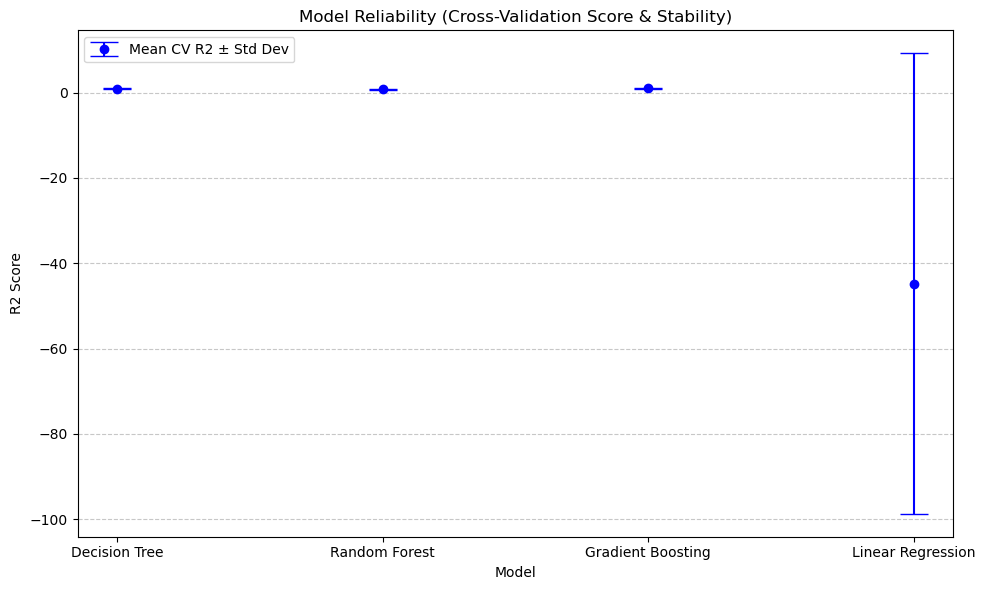

In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

results = {
    'Model': ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'Linear Regression'],
    'MAE': [mae_dt, mae_rf, mae_gb, mae_lr],
    'MSE': [mse_dt, mse_rf, mse_gb, mse_lr],
    'RMSE': [rmse_dt, rmse_rf, rmse_gb, rmse_lr],
    'R2 Score': [r2_dt, r2_rf, r2_gb, r2_lr],
    'CV R2 Mean': [cv_dt.mean(), cv_rf.mean(), cv_gb.mean(), cv_lr.mean()],
    'CV R2 Std Dev': [std_dev_dt, std_dev_rf, std_dev_gb, std_dev_lr]
}

comparison_df = pd.DataFrame(results)
print("--- Model Comparison ---")
print(comparison_df)


# Plotting the reliability comparison
plt.figure(figsize=(10, 6))
plt.errorbar(comparison_df['Model'], comparison_df['CV R2 Mean'], # Corrected column name here
             yerr=comparison_df['CV R2 Std Dev'], fmt='o', capsize=10, color='blue', label='Mean CV R2 ± Std Dev')
plt.title('Model Reliability (Cross-Validation Score & Stability)')
plt.ylabel('R2 Score')
plt.xlabel('Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


1. Primary Metric:

Mean Cross-Validation (CV) Score:

A single test score can be "lucky." The best model is the one with the highest Mean CV $R^2$. This tells you how the model performs on average across many different subsets of your data.

2. Secondary Metric:

Stability (Standard Deviation) :

 "best" model must be stable. We look at the CV Standard Deviation. A lower value means the model's performance doesn't swing wildly when it sees new data.

 3. Error Magnitude (RMSE & MAE):

 In environmental data like air emissions, small errors matter. RMSE (Root Mean Squared Error) punishes large errors more severely.

# **MODEL PREDICTION**

In [95]:
# Build results DataFrame from original feature DataFrame (x1) using test indices
results = x1.loc[y1_test.index].copy()
results['Present'] = y1_test
results['Future'] = y1_pred_gb

# For classification, include probability of positive class if applicable.
# For regression models (e.g., GradientBoostingRegressor) there is no class probability.
from sklearn.ensemble import GradientBoostingClassifier

if isinstance(gb_model, GradientBoostingClassifier):
    try:
        # use existing y_prob if defined
        results['Prob_Positive'] = y_prob
    except NameError:
        # try to compute probabilities from the model
        try:
            results['Prob_Positive'] = gb_model.predict_proba(x1.loc[y1_test.index])[:, 1]
        except Exception:
            results['Prob_Positive'] = np.nan
else:
    # regression model — set NaN for probability column
    results['Prob_Positive'] = np.nan

print(results.head())


     consumption  avg_rainfall_mm  fire_brightness  fire_frp  normalized_conc  \
255    -0.001902         1.027230        -2.225361 -1.658559         0.075532   
114     0.308688         1.071053        -0.171016  0.501800         1.601805   
314     0.626936         0.724969         1.918117 -1.885696        -0.894064   
268    -1.393006        -0.772136         0.221320 -0.521091         1.866073   
167    -0.404663         0.105989        -0.336033 -0.499399        -0.921592   

     traffic_emissions  traffic_fire  ipi_pollution  ipi_firefrp   Present  \
255           0.451459     -0.985098       0.119206    -1.638556  0.333370   
114           1.276266      0.081237       1.671424     0.610765  0.394741   
314          -0.907183     -1.710670      -0.885189    -1.825613  0.380519   
268           1.385776     -0.758315       1.805962    -0.585590  0.424653   
167          -0.938031     -0.859930      -0.926687    -0.497187  0.387505   

       Future  Prob_Positive  
255  0.332821

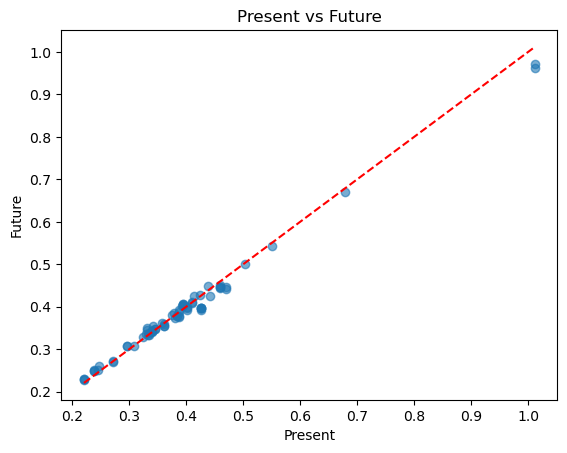

In [96]:
import matplotlib.pyplot as plt

plt.scatter(results['Present'], results['Future'], alpha=0.6)
plt.plot([results['Present'].min(), results['Present'].max()],
         [results['Present'].min(), results['Present'].max()],
         'r--')
plt.xlabel('Present')
plt.ylabel('Future')
plt.title('Present vs Future')
plt.show()
